In [4]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *

from time import time
from tqdm import tqdm

In [23]:
scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18'],
#    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario_nointer = scenario.copy()
scenario_inter = scenario.copy()
scenario_inter['Inter'] = ['Rodrigues18']

scenario_local = {
    'Local' : ['Piro18/wind'],
}

scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
    'N_inter' : True
}


alphas = np.arange(1,10)/3

models_IGMF = [ 'alpha{}-3rd'.format(i) for i in range(1,10) ]


scenario0 = {
    'IGM' : ['alpha3-3rd'],
    'Host' : ['Rodrigues18'],
#    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}
scenario1 = {
    'IGM' : ['alpha1-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}
scenario9 = {
    'IGM' : ['alpha9-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}
scenario_IGM = {
    'IGM' : ['alpha1-3rd'],
}

scenario_tmp = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario1_ = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
#    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

In [3]:
print(scenario_inter)
KeyTelescope(N_inter=True,**scenario_inter)

{'Inter': ['Rodrigues18'], 'Host': ['Rodrigues18'], 'IGM': ['primordial'], 'Local': ['Piro18/wind']}


'Parkes/SMD/primordial/Rodrigues18_NInter/Rodrigues18/Piro18/wind/DM/P'

renormalize 100.00007090315172
renormalize 10717.996600536851
renormalize 12359040460.042944
renormalize 33333516228.5312


(1, 1000000.0)

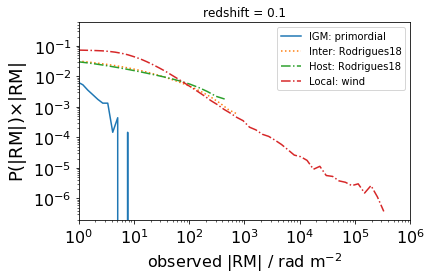

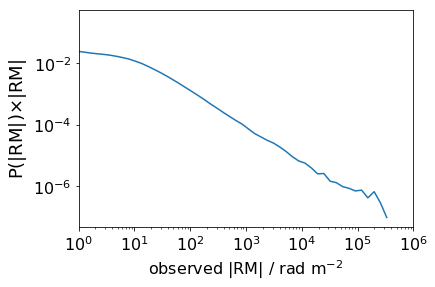

In [12]:
scenario_test = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}


measure='RM'
redshift = 0.1
PlotContributions(measure=measure, redshift=redshift, **scenario_test)
plt.xlim(1,1e6)
Ps, xs = [], []
Ps, xs = [np.ones(100)], [10.**np.linspace(-9,-8,101)]
for region in scenario_test:
    P, x = GetLikelihood( measure=measure, redshift=redshift, region=region, model=scenario_test[region][0] )
    Ps.append(P)
    xs.append(x)

P, x = LikelihoodsConvolve( Ps=Ps, xs=xs,  )
    
PlotLikelihood( x=x, P=P, measure=measure, density=True)
plt.xlim(1,1e6)

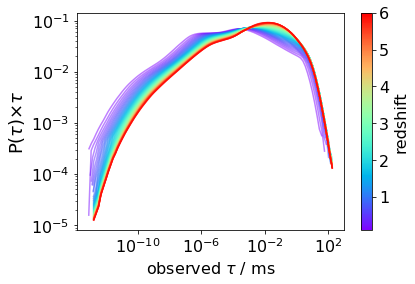

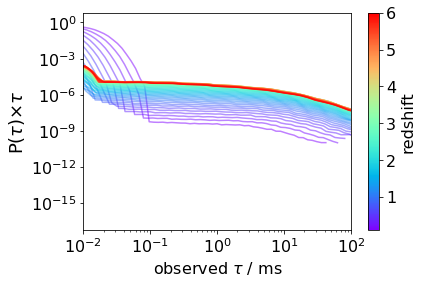

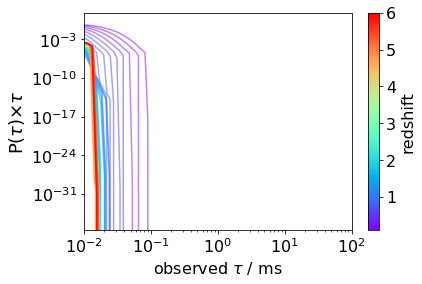

In [16]:
PlotLikelihoodEvolution( measure='tau', scenario={'Inter':['Rodrigues18']})
#plt.xlim(1e-2,1e2)
PlotLikelihoodEvolution( measure='tau', scenario=scenario_inter)
plt.xlim(1e-2,1e2)
plt.show()
PlotLikelihoodEvolution( measure='tau', scenario=scenario_nointer)
plt.xlim(1e-2,1e2)
plt.show()

In [7]:
print(LikelihoodNorm(P,x))

0.9999999999999999


In [24]:
scenario

{'Host': ['Rodrigues18'],
 'IGM': ['primordial'],
 'Inter': ['Rodrigues18'],
 'Local': ['Piro18/wind'],
 'N_inter': True}

{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha1-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha2-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha3-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha4-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha5-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha6-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha7-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True, 'Inter': ['Rodrigues18'], 'Local': ['Piro18/wind'], 'IGM': ['alpha8-3rd_C900'], 'Host': ['Rodrigues18']}
{'N_inter': True

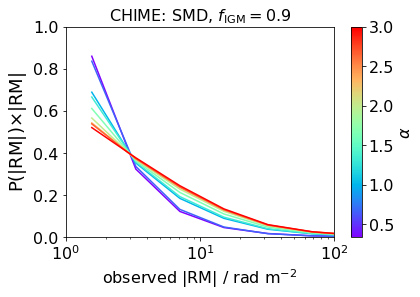

In [30]:
telescope = 'CHIME'
population = 'SMD'

force=False

for f_IGM in [.3,.4,.5,.6,.7,.8,.9][-1:]:
    fig,ax = plt.subplots()
#    for model in np.array(models_IGMF)[np.array([0,2,-1])]:
    colors = list(Rainbow(alphas))[::-1]
    for model in np.array(models_IGMF):
        tmp = scenario.copy()
        tmp['IGM'] = [model+'_C{:.0f}'.format(f_IGM*1000)]
        print(tmp)
#        PlotLikelihoodEvolution(measure='RM', scenario=tmp, measureable=True, force=force )
        PlotTelescope( measure='RM', scenario=tmp, measureable=True, ax=ax, dev=False, label=Label(model), color=colors.pop(), force=force)
#    ax.set_ylim(2e-1,3e-1)
    ax.set_ylim(1e-6,1)
    ax.set_xlim(1, 1e2 )
    ax.set_yscale('linear')
#    ax.legend()
    ax.set_title( r"{}: {}, $f_{{\rm IGM}} = {}$".format(telescope, population, f_IGM), fontsize=16 )
    Colorbar( alphas, ax=ax, label=r"$\alpha$" )
    AllSidesTicks(ax)
    plt.show()

compute likelihood of measure in full scenario for individual source redshifts. Takes a long time to compute all the convolutions. Results are saved to likelihood_file_Full and loaded faster later on.

In [4]:

ComputeFullLikelihood( scenario=scenario, models_IGMF=models_IGMF, N_processes=3)

alpha1-3rd 0.2
alpha1-3rd 1.2000000000000002
alpha1-3rd 0.2
alpha1-3rd 1.2000000000000002
alpha1-3rd 0.7000000000000001
alpha1-3rd 0.7000000000000001


Process ForkPoolWorker-9:
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.4/multiprocessing/pool.py", line 119, i

KeyboardInterrupt: 

alpha1-3rd 3.1
alpha1-3rd 3.1
alpha1-3rd 3.2
alpha1-3rd 3.2


plot the redshift evolution of the likelihood function of all predicted measures in any scenario

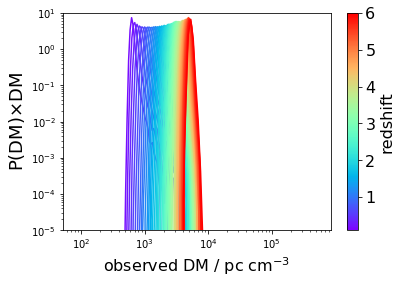

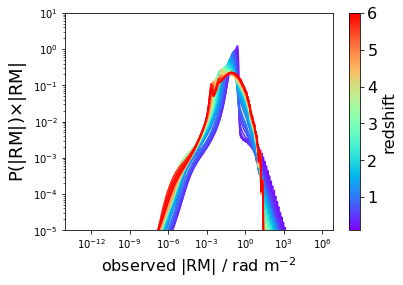

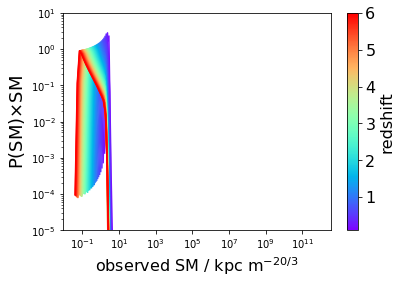

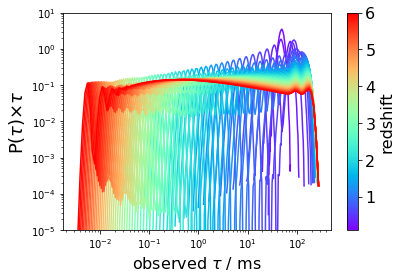

In [9]:
for measure in measures:
    PlotLikelihoodEvolution( measure=measure,  scenario=scenario0)
    plt.ylim(1e-5,10)

plot redshift evolution of RM for three prominent IGMF models

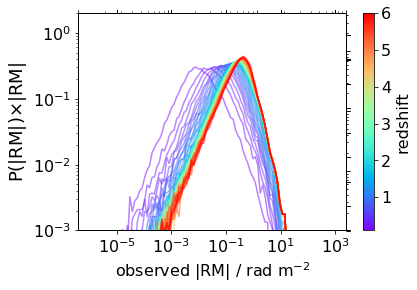

In [5]:
for ia, a in enumerate([1,3,9][:1]):
    tmp = scenario_IGM.copy()
    #tmp = scenario9.copy()
    tmp['IGM'] = ['alpha%i-3rd' % a]
    PlotLikelihoodEvolution( measure='RM', scenario=tmp, measureable=False )
    #plt.title( labels[tmp['IGM'][0]] )
    plt.ylim(1e-3,2)
    plt.xlim(1e-3,1)

we can also use to easily compare likelihood functions for several scenarios using the same procedure. It is even possible to only show the part of expected distribution that can actually be observed by telescopes.

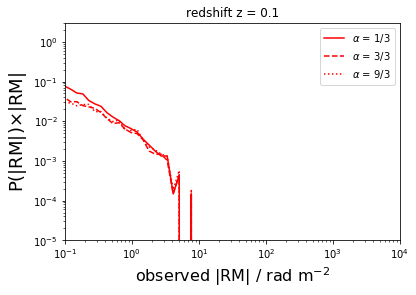

In [14]:
fig, ax = plt.subplots()
redshifts=np.array([0.1])
for ia, (a, l) in enumerate( zip( [1,3,9], ['-','--',':']) ):
    tmp = scenario_IGM.copy()
#    tmp = scenario9.copy()
    tmp['IGM'] = ['alpha%i-3rd' % a]
    PlotLikelihoodEvolution( label=labels[tmp['IGM'][0]], measure='RM', scenario=tmp, measureable=False, redshift_bins=redshifts, ax=ax, colorbar=False, linestyle=l )
plt.title( "redshift z = %.1f" % redshifts[0] )
plt.ylim(1e-5,3)
plt.xlim(1e-1,1e4)
plt.legend()

In [6]:
alphas

array(['alpha1-3rd', 'alpha3-3rd', 'alpha9-3rd'], dtype='<U20')

In [28]:
d={'A':[0]}



{'A': [0]}

### Plot Telescope Likelihoods
compute the expected contribution of individual models as observed by a particular telescope, considering a cosmic population of FRBs as well as selection effects of telescopes

<Figure size 432x288 with 0 Axes>

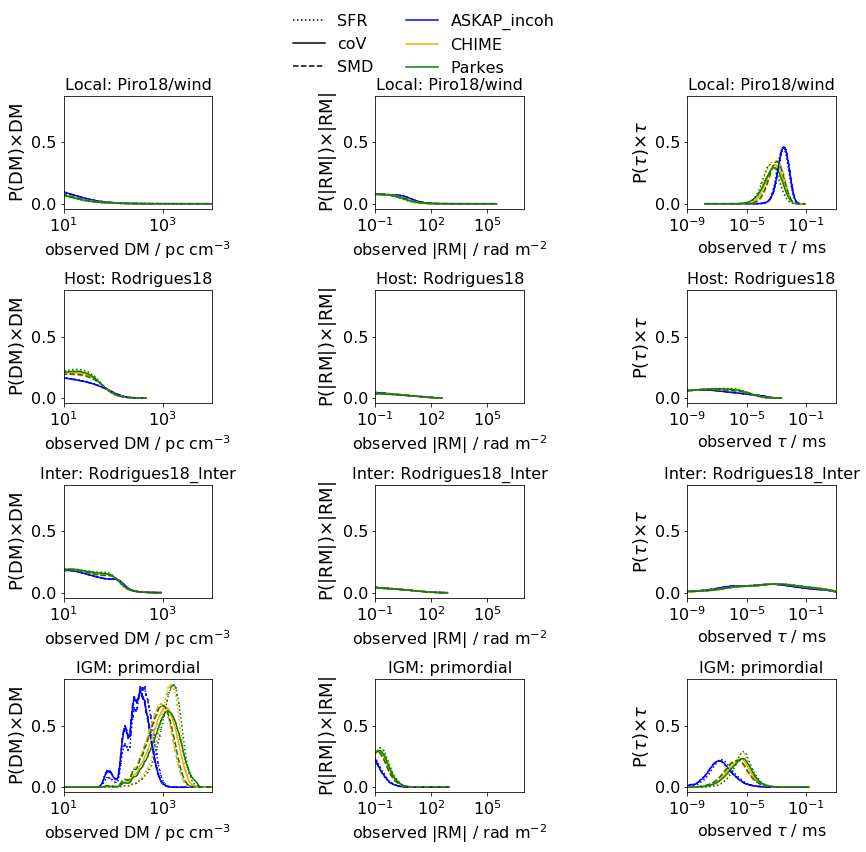

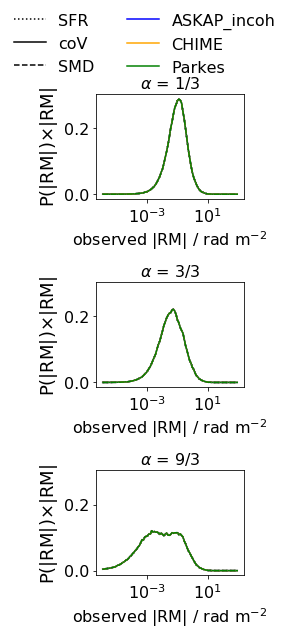

In [11]:
## what should be plotted?
measures = ['DM', 'RM', 'tau']
#telescopes = ['chime','askap-fly','parkes']
#populations = ['vol_co','smd','sfr']

force = False

## which models to plot?
models = [
    { 'Local':['Piro18/wind']},
    { 'Host':['Rodrigues18']},
    { 'Inter':['Rodrigues18']},
    { 'IGM' : ['primordial']},
]


## which IGM models to compare?
scenarios_IGMF = [
    { 'IGM' : ['alpha1-3rd']},
    { 'IGM' : ['alpha3-3rd']},
    { 'IGM' : ['alpha9-3rd']},
]

handles = []
for population, linestyle in zip( populations, linestyles_population ):
    handles.append( plt.plot( [0,1],[0,1], label=population, color='black', linestyle=linestyle )[0] )

for telescope, color in zip( telescopes, colors_telescope ):
    handles.append( plt.plot( [0,1],[0,1], label=telescope, color=color )[0] )

plt.legend()
plt.clf()

fig, axs = plt.subplots( len(models) , len(measures), figsize=(4*len(measures), 3*len(models) ), sharex='col', sharey='all' )

for i_m, model in enumerate( models ):
    for ax in axs[i_m]:
        ax.set_title( "{0}: {1}".format( list(model.keys())[0], '/'.join( KeyFull( **model ).split('/')[:-3] ) ), fontsize=16 )
    for i_v, measure in enumerate( measures ):
        for population, linestyle in zip( populations, linestyles_population):
            for telescope, color in zip( telescopes, colors_telescope):
                PlotTelescope( measure=measure, population=population, telescope=telescope, ax=axs[i_m][i_v], scenario=model, linestyle=linestyle, color=color, force=force )

axs[0][0].set_xlim(1e1,1e4)
axs[0][1].set_xlim(1e-1,1e7)
axs[0][2].set_xlim(1e-9,1e1)
#axs[0][0].set_ylim(1e-5,3)
axs[0][0].set_yscale('linear')
axs[0][1].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()

fig, axs = plt.subplots( len( scenarios_IGMF ), 1, figsize=( 4,len( scenarios_IGMF )* 3 ), sharex='all', sharey='all' )

for i_m, model in enumerate( scenarios_IGMF ):
    axs[i_m].set_title( r"$\alpha$ = %s/3" % model['IGM'][0].split('-')[0][-1], fontsize=16 )
    for population, linestyle in zip( populations, linestyles_population ):
        for telescope, color in zip( telescopes, colors_telescope ):
            PlotTelescope( measure='RM', ax=axs[i_m], scenario=model, linestyle=linestyle, color=color, force=force  )

axs[0].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )
#axs[0].set_ylim(1e-5,3)
axs[0].set_yscale('linear')

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()




plot likelihood of measure as observed by telescope in realistic scenarios

{'Host': ['Rodrigues18'], 'IGM': ['primordial'], 'Local': ['Piro18/wind'], 'Inter': ['Rodrigues18']}


'primordial/Rodrigues18/Rodrigues18/Piro18/wind/0.1/DM/P'

this took 0.0 minutes


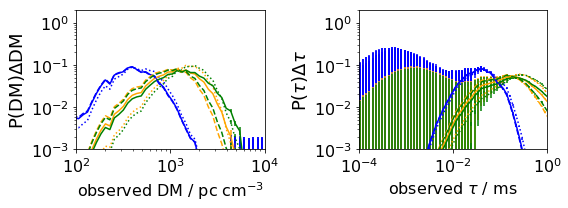

In [7]:
measures = ['DM', 'tau']
telescope = 'Parkes'
population = 'SMD'
fig, axs = plt.subplots( 1, len(measures), figsize=(4*len(measures),3) )

t0 = time()
for population, linestyle in zip( populations, linestyles_population):
    for telescope, color in zip( telescopes, colors_telescope):
        for i_m, measure in enumerate( measures ):
            P = GetLikelihood_Telescope(measure=measure, telescope=telescope, dev=True, population=population, **scenario )
            PlotLikelihood( *P, measure=measure, ax=axs[i_m], density=False, linestyle=linestyle, color=color )
for ax in axs:
    ax.set_ylim(1e-3,2)
axs[0].set_xlim(1e2,1e4)
axs[1].set_xlim(1e-4,1)
plt.tight_layout()
print( "this took %.1f minutes" % ( (time()-t0)/60 ) )

plot likelihood of RM as observed by telescope in realistic scenarios with prominent IGMF models

<Figure size 432x288 with 0 Axes>

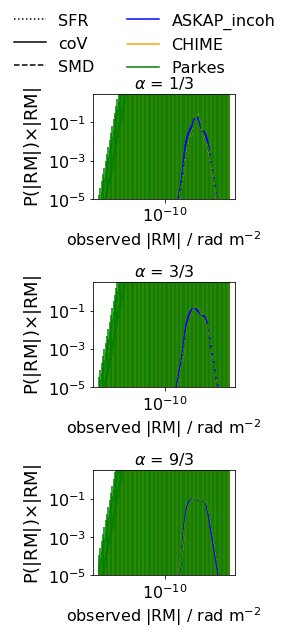

In [5]:
## ## which full scenarios to plot for IGMF?
alphas = np.array(models_IGM)[np.array([3,5,-1])]
scenarios = []
scenario_tmp = scenario.copy()
for alpha in alphas:
    scenario_tmp['IGM'] = [alpha]
    scenarios.append( scenario_tmp.copy() )
    

handles = []
for population, linestyle in zip( populations, linestyles_population ):
    handles.append( plt.plot( [0,1],[0,1], label=population, color='black', linestyle=linestyle )[0] )

for telescope, color in zip( telescopes, colors_telescope ):
    handles.append( plt.plot( [0,1],[0,1], label=telescope, color=color )[0] )

plt.legend()
plt.clf()
    
fig, axs = plt.subplots( len( scenarios ), 1, figsize=( 4,len( scenarios )* 3 ), sharex='all', sharey='all' )
for i_s, scenario in enumerate(scenarios):
    axs[i_s].set_title( labels[scenario['IGM'][0]], fontsize=16 )
    for population, linestyle in zip( populations, linestyles_population):
        for telescope, color in zip( telescopes, colors_telescope):
            PlotTelescope( measure='RM', population=population, telescope=telescope, ax=axs[i_s], scenario=scenario, linestyle=linestyle, color=color )


axs[0].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )
axs[0].set_ylim(1e-5,3)

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()


In [ ]:
file_redshifts_DM_tau = root+"results/table_redshifts_DM_tau.tex"
    
### investigate how additional info from tau refines results


## file creation template
f = open( file_redshifts_DM_tau, 'w' )
    f.write( R"\begin{tabular}{l|c|c|c|c|c|c}" )
    f.write( "\n\t")
    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $\tau$ / ms & $z_{\rm vol\_co}(\DM,\tau)$  & $z_{\rm smd}(\DM,\tau)$ & $z_{\rm sfr}(\DM,\tau)$ \\" )
    for i in [1,2]:
        f.write( "\n\t")
        f.write( R"FRB123456 & 1000 & 10 & 1 & $1.00 \pm 0.10$ & $1.00 \pm 0.10$ & $1.00 \pm 0.10$ \\" )
    f.write( "\n")
    f.write( R"\end{tabular}" )

Here we compare the contribution of different regions for FRBs from a particular redshift.

(0.0001, 10)

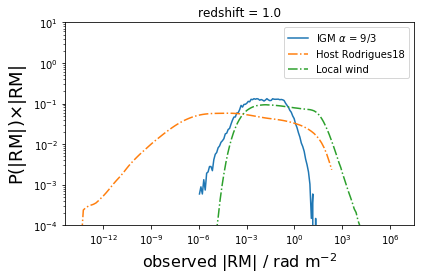

In [34]:
PlotContributions( redshift=1., measure='RM', **scenario )
plt.ylim(1e-4,10)

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


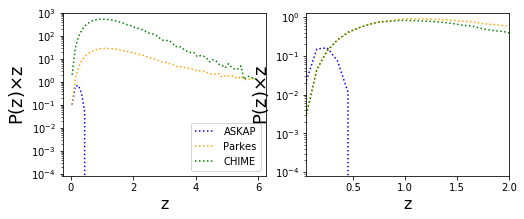

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(8,3))
P_old = 1
for it, (telescope, color) in enumerate( zip(np.array(telescopes)[np.array([0,2,1])], colors_telescope) ):
    for population, linestyle in zip( populations[1:2], linestyles_population ):
        P, x = GetLikelihood_Redshift( telescope=telescope, population=population )
        if it == 0:
            P_ = P
        elif it == 1:
            P_ = P/P[0]*P_old[0]
        elif it == 2:
            P_ = P/P[-5]*P_old[-5]
        P__ = P/P.max()
        PlotLikelihood( P=P_, x=x, label=telescope, measure='z', ax=axs[0], color=color, linestyle=linestyle)
        PlotLikelihood( P=P__, x=x, label=telescope, measure='z', ax=axs[1], color=color, linestyle=linestyle)
        P_old = P_[:]
axs[0].legend()        
axs[0].set_ylim(8e-5,1000)
axs[0].set_xscale('linear')
axs[1].set_xlim(-0.1,2.)
axs[1].set_ylim(8e-5,1.3)
axs[1].set_xscale('linear')


['None' 'ASKAP_incoh' 'CHIME' 'Parkes']


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:38: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5


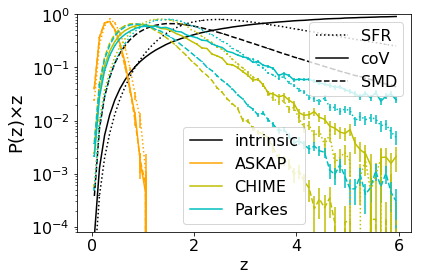

In [41]:
teles = np.append( 'None', telescopes )
colors_teles = np.append( 'black', colors_telescope )
print(teles)
colors_teles[1] = 'orange'
colors_teles[2] = 'y'
colors_teles[3] = 'c'
fig, ax = plt.subplots()
#for telescope, color in zip(telescopes, colors_telescope):
for telescope, color in zip(teles, colors_teles):
    for population, linestyle in zip( populations, linestyles_population ):
        P, x, dev = GetLikelihood_Redshift( telescope=telescope, population=population, dev=True )
        PlotLikelihood( P=P, x=x, dev=dev, label="%s with %s" % (population, telescope), measure='z', ax=ax, color=color, linestyle=linestyle)
#        print( 'max redshift = %.1f ' % x[np.where(P>0)[0][-1]] )

        
ts = []
for telescope, color in zip(teles, colors_teles):
    ts.append( ax.plot( [0,1], [1e3,1e3], label=labels[telescope], color=color )[0] )
legend_t = ax.legend( ts, [ labels[t] for t in teles], loc=8, fontsize=16 )

ps = []
for population, linestyle in zip( populations, linestyles_population ):
    ps.append( ax.plot( [0,1], [1e3,1e3], label=population, linestyle=linestyle, color='black' )[0] )
legend_p = ax.legend( ps, populations, loc=1, fontsize=16)

        
ax.set_ylim(8e-5,1)
ax.set_xscale('linear')
#ax.legend()
ax.add_artist( legend_t )
#ax.add_artist( legend_p )
ax.tick_params(axis='both', which='major', labelsize=16)
AllSidesTicks( ax )

In [6]:
d = {'a':1,'b':2}


d[np.array(['a','b'])]

TypeError: unhashable type: 'numpy.ndarray'

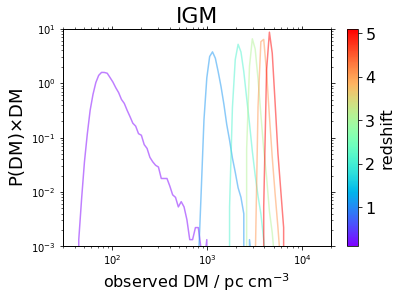

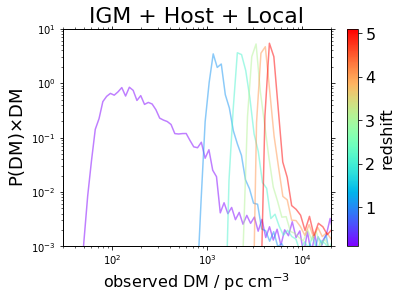

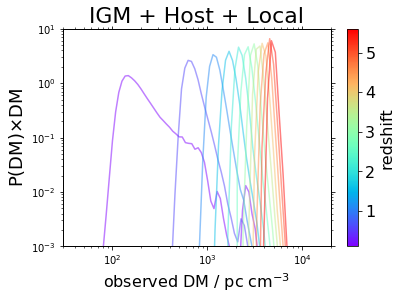

In [35]:


fig, ax = plt.subplots()
PlotLikelihoodEvolution( measure='DM', scenario=scenario_IGM, redshift_bins=redshift_bins[::10], ax=ax )
plt.title( 'IGM', fontdict={'size':22})
plt.ylim(1e-3,10)
plt.xlim(3e1,2e4)
AllSidesTicks( ax )
plt.show()

fig, ax = plt.subplots()
PlotLikelihoodEvolution( measure='DM', scenario=scenario, redshift_bins=redshift_bins[::10], ax=ax)
plt.title( 'IGM + Host + Local', fontdict={'size':22})
plt.ylim(1e-3,10)
plt.xlim(3e1,2e4)
AllSidesTicks( ax )
plt.show()

scenario = {
    'IGM' : ['primordial'],
    'Host': ['JF12/StarDensity_MW'],
    'Local': ['Piro18/uniform/JF12'], 
}


fig, ax = plt.subplots()
PlotLikelihoodEvolution( measure='DM', scenario=scenario, redshift_bins=redshift_bins[::5], ax=ax)
plt.title( 'IGM + Host + Local', fontdict={'size':22})
plt.ylim(1e-3,10)
plt.xlim(3e1,2e4)
AllSidesTicks( ax )
plt.show()


In [45]:
with h5.File( likelihood_file_local ) as f:
    print( f['Piro18/uniform/JF12'].keys())

<KeysViewHDF5 ['DM', 'RM', 'SM', 'tau']>


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [5]:
with h5.File( likelihood_file_galaxy )as f:
    P = f['Host/JF12/StarDensity_MW/RM/P'][:]
    x = f['Host/JF12/StarDensity_MW/RM/x'][:]

for redshift in np.round(redshift_range,4):
    P_ = P * (1+redshift)**2
    x_ = x / (1+redshift)**2
    Write2h5( filename=likelihood_file_galaxy, datas=[P_, x_], keys=[ KeyHost( model='JF12/StarDensity_MW', redshift=redshift, measure='RM', axis=axis ) for axis in ['P','x'] ] )


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [7]:
P = np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.68891413e-05, 1.35047232e-04, 1.19255870e-04, 1.22466032e-04,
       1.53100977e-04, 2.88811817e-04, 2.65815639e-04, 4.18662464e-04,
       4.06819846e-04, 3.45523072e-04, 8.73274881e-03, 1.48573431e-02,
       1.24185993e-02, 1.61507680e-02, 1.25030614e-02, 1.09857962e-02,
       1.05824340e-02, 7.27064463e-03, 6.30454077e-03, 6.35742202e-03,
       4.69893947e-03, 4.69108190e-03, 4.13857110e-03, 4.11018527e-03,
       3.59954238e-03, 2.76759043e-03, 2.42158415e-03, 1.96084052e-03,
       1.79391118e-03, 1.65620591e-03, 1.41040669e-03, 1.21466068e-03,
       1.00642364e-03, 1.04931109e-03, 8.33701161e-04, 5.98972221e-04,
       7.99198923e-04, 4.68414235e-04, 6.23560232e-04, 3.72215519e-04,
       4.81230330e-04, 2.41115878e-04, 3.80306986e-04, 2.30772874e-04,
       2.72778638e-04, 2.89527670e-04, 1.17354948e-04, 1.89131781e-04,
       2.29808709e-04, 8.82185126e-05, 1.29926364e-04, 1.49927675e-04,
       8.13712586e-05, 7.09800216e-05, 2.54363767e-05, 1.18251724e-05,
       6.46543991e-06, 3.26421762e-06, 1.92662782e-05, 1.00466776e-05,
       4.04220503e-06, 1.77867981e-06, 1.35785090e-06, 6.56805582e-07,
       4.42898563e-07, 3.51104228e-07, 3.07731967e-08, 1.05168968e-08,
       8.26266879e-06, 1.20010562e-05, 2.82164761e-06, 2.46309438e-06,
       1.03476641e-06, 9.17996458e-08, 2.99666392e-07, 4.30611866e-09,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

x = np.array([   10.        ,    10.71519305,    11.48153621,    12.30268771,
          13.18256739,    14.12537545,    15.13561248,    16.21810097,
          17.37800829,    18.62087137,    19.95262315,    21.3796209 ,
          22.90867653,    24.54708916,    26.30267992,    28.18382931,
          30.1995172 ,    32.35936569,    34.67368505,    37.15352291,
          39.81071706,    42.65795188,    45.70881896,    48.97788194,
          52.48074602,    56.23413252,    60.25595861,    64.5654229 ,
          69.18309709,    74.13102413,    79.43282347,    85.11380382,
          91.20108394,    97.7237221 ,   104.71285481,   112.20184543,
         120.22644346,   128.82495517,   138.03842646,   147.91083882,
         158.48931925,   169.82436525,   181.97008586,   194.98445998,
         208.92961309,   223.87211386,   239.8832919 ,   257.03957828,
         275.42287033,   295.12092267,   316.22776602,   338.84415614,
         363.07805477,   389.04514499,   416.86938347,   446.68359215,
         478.63009232,   512.86138399,   549.54087386,   588.84365536,
         630.95734448,   676.08297539,   724.43596007,   776.24711663,
         831.7637711 ,   891.25093813,   954.99258602,  1023.29299228,
        1096.47819614,  1174.89755494,  1258.92541179,  1348.96288259,
        1445.43977075,  1548.81661891,  1659.58690744,  1778.27941004,
        1905.46071796,  2041.73794467,  2187.76162395,  2344.22881532,
        2511.88643151,  2691.53480393,  2884.03150313,  3090.29543251,
        3311.31121483,  3548.13389234,  3801.89396321,  4073.80277804,
        4365.1583224 ,  4677.35141287,  5011.87233627,  5370.3179637 ,
        5754.39937337,  6165.95001861,  6606.93448008,  7079.45784384,
        7585.77575029,  8128.30516164,  8709.63589956,  9332.54300797,
       10000.        ])


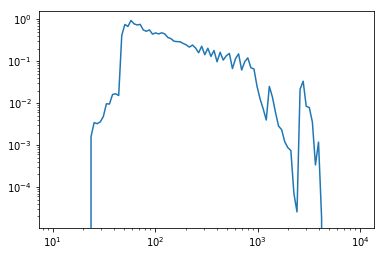

In [8]:
PlotLikelihood( P=P, x=x)

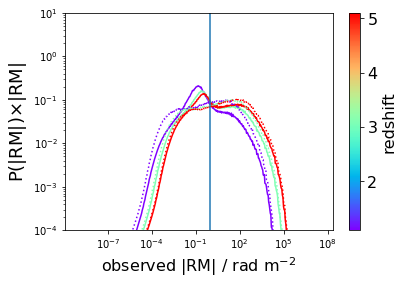

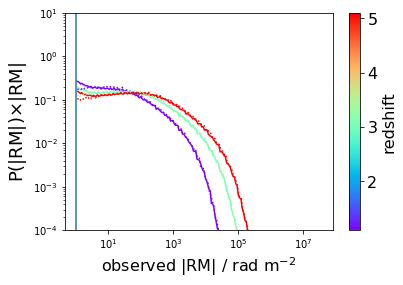

In [18]:
scenario = {
    'IGM' : ['primordial'],
    'Host': ['Heesen11/dirty'],
#    'Host': ['JF12/StarDensity_MW'],
    'Local': ['Piro18/wind'], 
}

cumulative=0


for lim in [False, True]:
    fig, ax = plt.subplots()
    tmp = scenario.copy()
    tmp['IGM'] = ['alpha1-3rd_C900']
    PlotLikelihoodEvolution( measure='RM',  measureable=lim, redshift_bins=redshift_bins[10::20], scenario=tmp, ax=ax, cumulative=cumulative )
    tmp['IGM'] = ['alpha9-3rd_C300']
    PlotLikelihoodEvolution( measure='RM',  measureable=lim, redshift_bins=redshift_bins[10::20], scenario=tmp, ax=ax, linestyle=':', colorbar=False, cumulative=cumulative )
    ax.set_ylim(1e-4,10)
    ax.axvline(1,1e-4,1)


(0, 3)

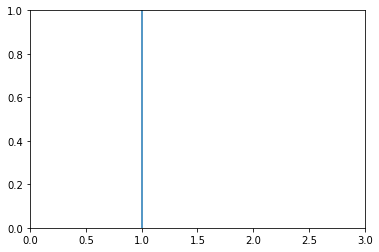


 28%|██▊       | 17/60 [01:02<06:59,  9.77s/it]

KeyboardInterrupt: 

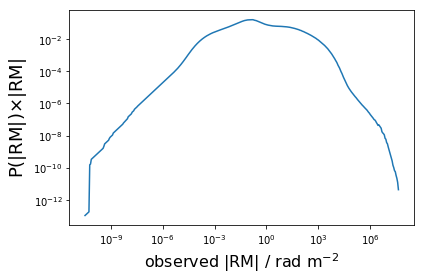

In [5]:
scenario = {
    'IGM' : ['primordial'],
    'Host': ['Heesen11/dirty'],
#    'Host': ['JF12/StarDensity_MW'],
    'Local': ['Piro18/wind'], 
}

cumulative=-1
population='SMD'
telescope='Parkes'

for lim in [False, True]:
    fig, ax = plt.subplots()
    tmp = scenario.copy()
    tmp['IGM'] = ['alpha1-3rd_C900']
    PlotTelescope( measure='RM', measureable=lim, population=population, telescope=telescope, scenario=tmp, ax=ax)
    tmp['IGM'] = ['alpha9-3rd_C300']
    PlotTelescope( measure='RM', measureable=lim, population=population, telescope=telescope, scenario=tmp, ax=ax)
    ax.set_ylim(1e-4,10)

In [ ]:
key = 'Host/Heesen11/dirty/'
axes = ['P','x']
for measure in ['DM','RM']:
    with h5.File( likelihood_file_galaxy ) as f:
        
        data = [ f['Host/Heesen11/dirty/%s/%s' % ( measure, axis ) ].value for axis in axes ]
        keys=[KeyHost( model='Heesen11/dirty', redshift=0.0, measure=measure, axis=axis) for axis in axes ]
        print(keys)
    Write2h5( filename=likelihood_file_galaxy, datas=data, keys=keys )
    

In [8]:
with h5.File( likelihood_file_galaxy ) as f:
    print( f['Host/Heesen11/dirty/0.0000/RM/x'] )
    

<HDF5 dataset "x": shape (101,), type "<f8">


/data/PreFRBLE/venv_PreFRBLE/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


{'IGM': ['primordial'],
 'Host': ['Rodrigues18/smd'],
 'Inter': ['Rodrigues18'],
 'Local': ['Piro18/wind']}

{'IGM': ['alpha1-3rd_C300'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}
{'IGM': ['alpha1-3rd_C900'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}
{'IGM': ['alpha9-3rd_C300'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}
{'IGM': ['alpha9-3rd_C900'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}


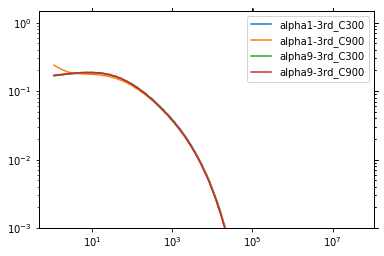

In [25]:

#fig, axss = plt.subplots( 2, 3, figsize=(12,6), sharex=True, sharey=True)
fig, ax = plt.subplots()
for alpha in [1, 9]:
#    fig, axss = plt.subplots( 2, 3, figsize=(12,6), sharex=True, sharey=True)
    for f_IGM in [0.3,0.9]:
        tmp = scenario.copy()
        tmp['IGM'] = ['alpha%i-3rd_C%.0f' % (alpha, f_IGM*1000)]
        print(tmp)
        for telescope in telescopes[-1:]:
#            ax.set_xlim(1e-3,1e3)
            ax.set_ylim(1e-3,1.5)
            #ax.set_ylim(1e-5,1.5)
#            ax.set_title( r"%s, $f_{\rm IGM}$=%.1f" % (telescope, f_IGM) )
            for population in populations[:1]:
                P, x = GetLikelihood_Telescope( measure='RM', telescope=telescope, population=population, force=False, **tmp )
                P, x = LikelihoodMeasureable( P=P, x=x, min=1)
                PlotLikelihood( P=P, x=x,label=tmp['IGM'][0], ax=ax )
            AllSidesTicks(ax)
#    axss[1][1].legend()
#    fig.tight_layout()
#    plt.show()
#axss[1][1].legend()
ax.legend()
#fig.tight_layout()
#plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]

{'IGM': ['alpha1-3rd_C500'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 20%|██        | 1/5 [00:00<00:02,  1.48it/s]

{'IGM': ['alpha1-3rd_C600'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 40%|████      | 2/5 [00:01<00:01,  1.50it/s]

{'IGM': ['alpha1-3rd_C700'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 60%|██████    | 3/5 [00:02<00:01,  1.40it/s]

{'IGM': ['alpha1-3rd_C800'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 80%|████████  | 4/5 [00:02<00:00,  1.36it/s]

{'IGM': ['alpha1-3rd_C900'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

{'IGM': ['alpha2-3rd_C500'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 20%|██        | 1/5 [00:00<00:03,  1.26it/s]

{'IGM': ['alpha2-3rd_C600'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 40%|████      | 2/5 [00:01<00:02,  1.25it/s]

{'IGM': ['alpha2-3rd_C700'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 60%|██████    | 3/5 [03:04<01:50, 55.38s/it]

{'IGM': ['alpha2-3rd_C800'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 80%|████████  | 4/5 [10:31<02:53, 173.01s/it]

{'IGM': ['alpha2-3rd_C900'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



100%|██████████| 5/5 [17:50<00:00, 214.09s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

{'IGM': ['alpha3-3rd_C500'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}



 20%|██        | 1/5 [07:18<29:12, 438.15s/it]

{'IGM': ['alpha3-3rd_C600'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}


KeyboardInterrupt: 

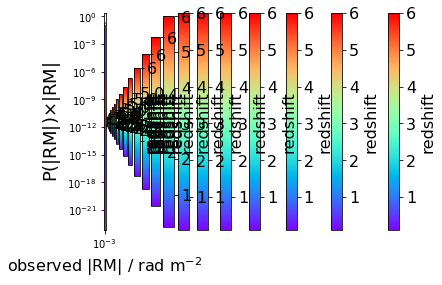

In [4]:
from tqdm import trange
f_IGMs = np.arange(0.5,0.91,0.1)
fig, ax = plt.subplots()
#fig, axss = plt.subplots( 2, 3, figsize=(12,6), sharex=True, sharey=True)
for alpha in np.arange(1,10):
#    fig, axss = plt.subplots( 2, 3, figsize=(12,6), sharex=True, sharey=True)
#    for f_IGM in f_IGMs:
    for i in trange(len(f_IGMs)):
        f_IGM = f_IGMs[i]
        tmp = scenario.copy()
        tmp['IGM'] = ['alpha%i-3rd_C%.0f' % (alpha, f_IGM*1000)]
        print(tmp)
        for measure in ['DM','RM']:
            PlotLikelihoodEvolution( measure='RM', scenario=tmp, ax=ax )
#            plt.show()
#axss[1][1].legend()
#ax.legend()
#fig.tight_layout()
#plt.show()

In [6]:
with h5.File( likelihood_file_IGM) as f:
    print(f.keys())

<KeysViewHDF5 ['alpha1-3rd', 'alpha1-3rd_C300', 'alpha1-3rd_C400', 'alpha1-3rd_C500', 'alpha1-3rd_C600', 'alpha1-3rd_C700', 'alpha1-3rd_C800', 'alpha1-3rd_C900', 'alpha2-3rd', 'alpha2-3rd_C300', 'alpha2-3rd_C400', 'alpha2-3rd_C500', 'alpha2-3rd_C600', 'alpha2-3rd_C700', 'alpha2-3rd_C800', 'alpha2-3rd_C900', 'alpha3-3rd', 'alpha3-3rd_C300', 'alpha3-3rd_C400', 'alpha3-3rd_C500', 'alpha3-3rd_C600', 'alpha3-3rd_C700', 'alpha3-3rd_C800', 'alpha3-3rd_C900', 'alpha4-3rd', 'alpha4-3rd_C300', 'alpha4-3rd_C400', 'alpha4-3rd_C500', 'alpha4-3rd_C600', 'alpha4-3rd_C700', 'alpha4-3rd_C800', 'alpha4-3rd_C900', 'alpha5-3rd', 'alpha5-3rd_C300', 'alpha5-3rd_C400', 'alpha5-3rd_C500', 'alpha5-3rd_C600', 'alpha5-3rd_C700', 'alpha5-3rd_C800', 'alpha5-3rd_C900', 'alpha6-3rd', 'alpha6-3rd_C300', 'alpha6-3rd_C400', 'alpha6-3rd_C500', 'alpha6-3rd_C600', 'alpha6-3rd_C700', 'alpha6-3rd_C800', 'alpha6-3rd_C900', 'alpha7-3rd', 'alpha7-3rd_C300', 'alpha7-3rd_C400', 'alpha7-3rd_C500', 'alpha7-3rd_C600', 'alpha7-3rd_C

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


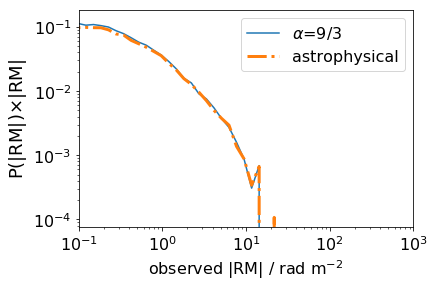

In [48]:
RM_min_ = 0.01*RM_min
fig, ax = plt.subplots()
P = GetLikelihood_Telescope( measure='RM', telescope='CHIME', population='SMD', **{'IGM':['alpha9-3rd']} )
#P, x = LikelihoodMeasureable( P=P, x=x, min=RM_min_)
PlotLikelihood( *P, measure='RM', ax=ax, label=r"$\alpha$=9/3")
#P1, x1 = P, x
P = GetLikelihood_Telescope( measure='RM', telescope='CHIME', population='SMD', **{'IGM':['astrophysical_median']} )
#P, x = LikelihoodMeasureable( P=P, x=x, min=RM_min_)
PlotLikelihood( *P, measure='RM', ax=ax, label='astrophysical', linestyle='-.', linewidth=3)
ax.legend(fontsize=16)
#ax.set_yscale('linear')
plt.xlim(1e-1,1e3)
#print(P is P1)
plt.show()
#plt.loglog(x[1:], P/P1 )
#plt.ylim(0.9,2)


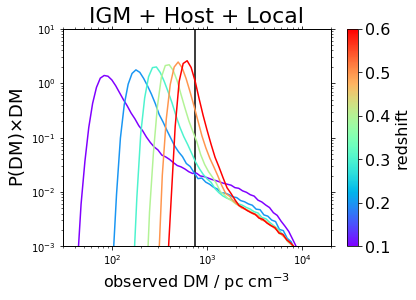

In [54]:
fig, ax = plt.subplots()
PlotLikelihoodEvolution( measure='DM', scenario=scenario, redshift_bins=redshift_bins[:6:], ax=ax)
plt.title( 'IGM + Host + Local', fontdict={'size':22})
plt.vlines( 750, 1e-3,10 )
plt.ylim(1e-3,10)
plt.xlim(3e1,2e4)
AllSidesTicks( ax )
plt.show()

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:755: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5


(0.0001, 1)

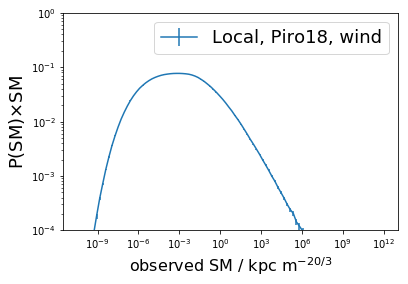

In [16]:
P, x, dev = GetLikelihood_Full( measure='SM', dev=True, redshift=0, **scenario_local )
PlotLikelihood( P=P, x=x, dev=dev, measure='SM', label='Local, Piro18, wind', density=True )
plt.legend( fontsize=18)
plt.ylim(1e-4,1)